# Advanced Regression

### Problem Statement

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia.

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

 

The company wants to know:

    - Which variables are significant in predicting the price of a house, and

    - How well those variables describe the price of a house.

## Step 1 : Data Sourcing and Data Understanding 

In [1]:
#import libraries
# Warning import
import warnings
warnings.filterwarnings('ignore')
#import libraries
import numpy as np 
import pandas as pd

#Data visulization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Model Librraries
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn import linear_model, metrics
from sklearn.feature_selection import RFE
import statsmodels.api as sm

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
#Reading the data set
Housing_df = pd.read_csv("train.csv")

Inspect the various aspects of the Housing dataframe

In [3]:
# Check the head of the dataset
Housing_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
#To get a concise summary of the data in a DataFrame
Housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
#Getting mathematical information about the dataframe
Housing_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## Step 2 : Data Cleaning

#### Based on the data, we can drop the following:

In [6]:
#Id     : It is the index count  in range(0-1460)
Housing_df.drop(['Id'], axis = 1, inplace= True)
Housing_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
# Replacing all Na values for the following Categorical columns with None becuse it i means that particular feature is not use in the inference.
Na_col = ["Alley", "MasVnrType", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "FireplaceQu", "GarageType", "GarageFinish", "GarageQual", "GarageCond", "PoolQC", "Fence", "MiscFeature"]
def Categorical_assumption(df, Na_col):
    for col in Na_col:
        df[col].fillna('None', inplace=True)
    return df

Housing_df = Categorical_assumption(Housing_df, Na_col)

#### filtering data

In [8]:
#Assumption - data which has >= 40% of null values would lead to inaccurate analysis, so dropping them

#Keeping only the columns which has missing value < 40% to make sure that the data analysis accuracy will not be affected
Housing_df = Housing_df.loc[:,(Housing_df.isnull().mean()*100) < 40]

In [9]:
# to check the size of the data set
Housing_df.shape

(1460, 80)

In [10]:
# Listing out all the coulumns in the dataframe
Housing_df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [11]:
#Check the value counts of a column in a DataFrame and identify values whose count is less than a specified threshold low Variance.

def Value_Count_Check(df, threshold):
     # Iterate over columns in the DataFrame
    for column in df.columns:
        # Calculate value counts
        value_counts = df[column].value_counts(ascending= False,normalize=True)
        
        # Check if any value has a count greater than the threshold
        if any(value_counts > threshold):
            # Droping the columns which is having the threshold greater than 85 per
            df = df.drop(column, axis=1)
            
    return df


Housing_df1 = Value_Count_Check(Housing_df, 0.85)

In [12]:
# to check the size of the data set
Housing_df1.shape

(1460, 50)

In [13]:
Housing_df1.head(5)

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,Fence,MoSold,YrSold,SaleCondition,SalePrice
0,60,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,7,5,2003,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,Gd,PConc,Gd,No,GLQ,706,150,856,Ex,856,854,1710,1,2,1,3,Gd,8,0,None,Attchd,2003.0,RFn,2,548,0,61,None,2,2008,Normal,208500
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,6,8,1976,1976,Gable,MetalSd,MetalSd,None,0.0,TA,CBlock,Gd,Gd,ALQ,978,284,1262,Ex,1262,0,1262,0,2,0,3,TA,6,1,TA,Attchd,1976.0,RFn,2,460,298,0,None,5,2007,Normal,181500
2,60,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,7,5,2001,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,Gd,PConc,Gd,Mn,GLQ,486,434,920,Ex,920,866,1786,1,2,1,3,Gd,6,1,TA,Attchd,2001.0,RFn,2,608,0,42,None,9,2008,Normal,223500
3,70,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,7,5,1915,1970,Gable,Wd Sdng,Wd Shng,None,0.0,TA,BrkTil,TA,No,ALQ,216,540,756,Gd,961,756,1717,1,1,0,3,Gd,7,1,Gd,Detchd,1998.0,Unf,3,642,0,35,None,2,2006,Abnorml,140000
4,60,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,8,5,2000,2000,Gable,VinylSd,VinylSd,BrkFace,350.0,Gd,PConc,Gd,Av,GLQ,655,490,1145,Ex,1145,1053,2198,1,2,1,4,Gd,9,1,TA,Attchd,2000.0,RFn,3,836,192,84,None,12,2008,Normal,250000


In [14]:
# The number of columns dropped from 80 to 50 since the previous step

In [15]:
#Removing those columns which has one value throughout from our HousingDataFrame to increase the accuracy of analysis
Housing_df1 = Housing_df1.loc[:,(Housing_df1.nunique() != 1)]

In [16]:
# no of columns with one value through the dataframe is zero.

#### Missing value imputation 

In [17]:
#Checkin missing or NaN values in a DataFrame
Housing_df1.isna().sum().sort_values(ascending=False)

LotFrontage      259
GarageYrBlt       81
MasVnrArea         8
MSSubClass         0
FireplaceQu        0
2ndFlrSF           0
GrLivArea          0
BsmtFullBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenQual        0
TotRmsAbvGrd       0
Fireplaces         0
GarageType         0
HeatingQC          0
GarageFinish       0
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
Fence              0
MoSold             0
YrSold             0
SaleCondition      0
1stFlrSF           0
TotalBsmtSF        0
MSZoning           0
YearRemodAdd       0
LotArea            0
LotShape           0
LotConfig          0
Neighborhood       0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
RoofStyle          0
BsmtUnfSF          0
Exterior1st        0
Exterior2nd        0
MasVnrType         0
ExterQual          0
Foundation         0
BsmtQual           0
BsmtExposure       0
BsmtFinType1 

In [18]:
'''
From the above we can see there are missing values or NAN in the following columns

Numerical Data
LotFrontage      - Linear feet of street connected to property
MasVnrArea       - Masonry veneer area in square feet
GarageYrBlt      - Year garage was built

'''

'\nFrom the above we can see there are missing values or NAN in the following columns\n\nNumerical Data\nLotFrontage      - Linear feet of street connected to property\nMasVnrArea       - Masonry veneer area in square feet\nGarageYrBlt      - Year garage was built\n\n'

##### Numerical Data

In [19]:
#Next step is to find if we need to use mean/median to replace NaN so that we can proceed with analysis fo the avove Numerica data

In [20]:
#Getting mathematical information about the series in the dataframe
Housing_df1['LotFrontage'].describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

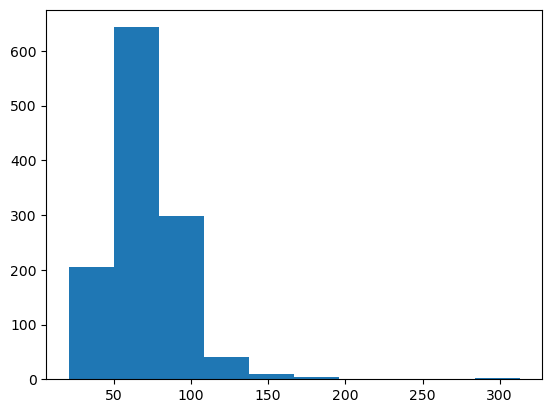

In [21]:
#1.LotFrontage
plt.hist(Housing_df1['LotFrontage'])
plt.show

In [22]:
#we can see that from the histogram, data is skewed in between 50 and 100 and it indicates that we should use median in this case
Housing_df1['LotFrontage'] = Housing_df1['LotFrontage'].fillna(Housing_df1['LotFrontage'].median())

#checking if there is any NaN after imputation
Housing_df1['LotFrontage'].isna().sum()

0

In [23]:
#Getting mathematical information about the series in the dataframe
Housing_df1['MasVnrArea'].describe()

count    1452.000000
mean      103.685262
std       181.066207
min         0.000000
25%         0.000000
50%         0.000000
75%       166.000000
max      1600.000000
Name: MasVnrArea, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

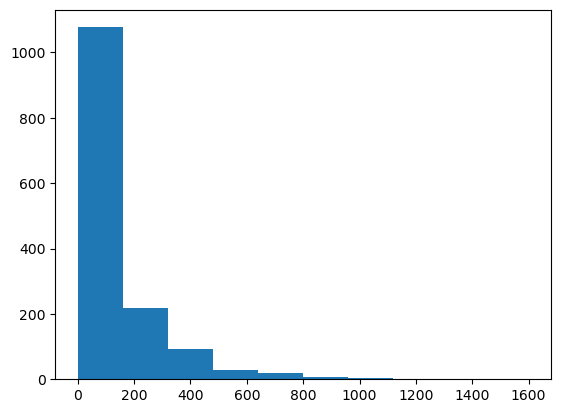

In [24]:
#2.MasVnrArea
plt.hist(Housing_df1['MasVnrArea'])
plt.show

In [25]:
#we can see that from the histogram, data is skewed at between 0 and it indicates that we should use median in this case.
Housing_df1['MasVnrArea'] = Housing_df1['MasVnrArea'].fillna(Housing_df1['MasVnrArea'].median())

#checking if there is any NaN after imputation
Housing_df1['MasVnrArea'].isna().sum()

0

In [26]:
#Getting mathematical information about the series in the dataframe
Housing_df1['GarageYrBlt'].describe()

count    1379.000000
mean     1978.506164
std        24.689725
min      1900.000000
25%      1961.000000
50%      1980.000000
75%      2002.000000
max      2010.000000
Name: GarageYrBlt, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

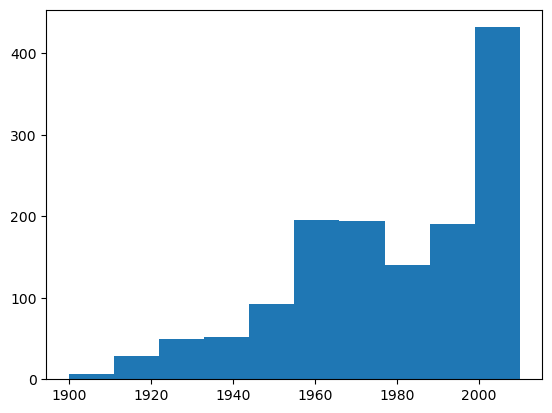

In [27]:
#3.GarageYrBlt
plt.hist(Housing_df1['GarageYrBlt'])
plt.show

In [28]:
#we can see that from the histogram, data is skewed at 2000 and it indicates that we should use median in this case
Housing_df1['GarageYrBlt'] = Housing_df1['GarageYrBlt'].fillna(Housing_df1['GarageYrBlt'].median())

#checking if there is any NaN after imputation
Housing_df1['GarageYrBlt'].isna().sum()

0

In [29]:
#Checkin missing or NaN values in a DataFrame after ampution
Housing_df1.isna().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
LotShape         0
LotConfig        0
Neighborhood     0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
Foundation       0
BsmtQual         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtUnfSF        0
TotalBsmtSF      0
HeatingQC        0
1stFlrSF         0
2ndFlrSF         0
GrLivArea        0
BsmtFullBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenQual      0
TotRmsAbvGrd     0
Fireplaces       0
FireplaceQu      0
GarageType       0
GarageYrBlt      0
GarageFinish     0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
Fence            0
MoSold           0
YrSold           0
SaleCondition    0
SalePrice        0
dtype: int64

In [30]:
# As we can see no column contains the NAN values in the Housing_df1 dataframe

## Step 3 : Data Visualisation and Data Preparation

#### Univariate analysis

In [31]:
Housing_df1.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'LotShape',
       'LotConfig', 'Neighborhood', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'Foundation',
       'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtUnfSF',
       'TotalBsmtSF', 'HeatingQC', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'Fence', 'MoSold', 'YrSold', 'SaleCondition',
       'SalePrice'],
      dtype='object')

Numerical data

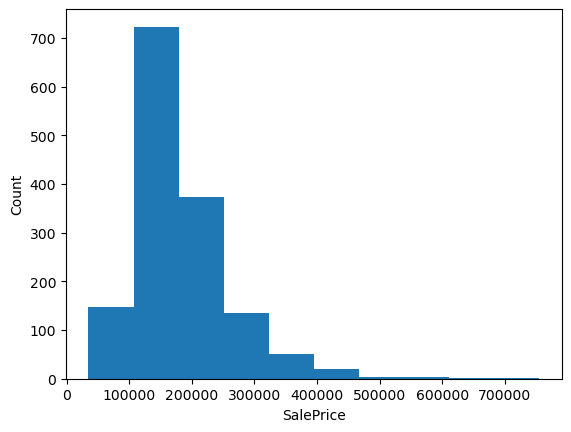

In [32]:
#1. SalePrice - The amount for house is going to be
plt.hist(Housing_df1['SalePrice'])
plt.xlabel('SalePrice')
plt.ylabel('Count')
plt.show()

In [33]:
Housing_df1['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [34]:
#Based on histogram and describe, we can observe that the SalePrice varies from 34900 to 755000 with the mean of 180921
#The maximum no of house SalePrice is in range form amount 34900 to 300000

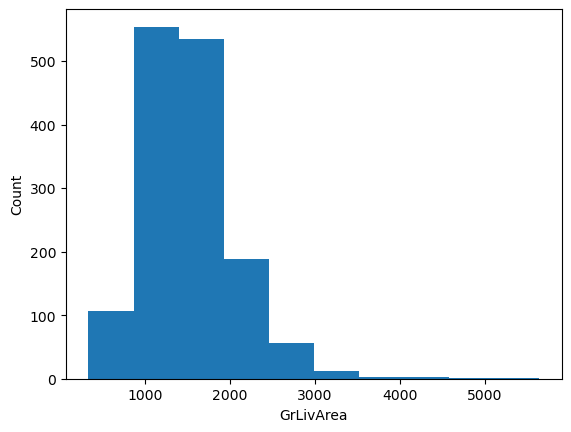

In [35]:
#2. GrLivArea- Above grade (ground) living area square feet
plt.hist(Housing_df1['GrLivArea'])
plt.xlabel('GrLivArea')
plt.ylabel('Count')
plt.show()

In [36]:
Housing_df1['GrLivArea'].describe()

count    1460.000000
mean     1515.463699
std       525.480383
min       334.000000
25%      1129.500000
50%      1464.000000
75%      1776.750000
max      5642.000000
Name: GrLivArea, dtype: float64

In [37]:
#Based on histogram and describe, we can observe that the GrLivArea varies from 334 to 5642 with the mean of 1515
#The most of the GrLivArea is in range form 334 to 2300

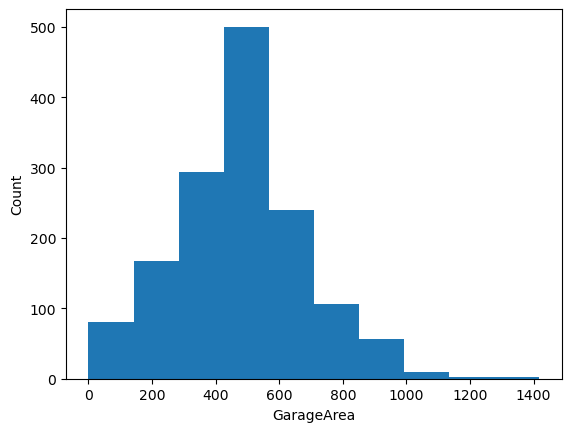

In [38]:
#3. GarageArea- Size of garage in square feet
plt.hist(Housing_df1['GarageArea'])
plt.xlabel('GarageArea')
plt.ylabel('Count')
plt.show()

In [39]:
Housing_df1['GarageArea'].describe()

count    1460.000000
mean      472.980137
std       213.804841
min         0.000000
25%       334.500000
50%       480.000000
75%       576.000000
max      1418.000000
Name: GarageArea, dtype: float64

In [40]:
#Based on histogram and describe, we can observe that the GarageArea varies from 0 to 1418 with the mean of 472
#The most of the GarageArea is in range form 0 to 800

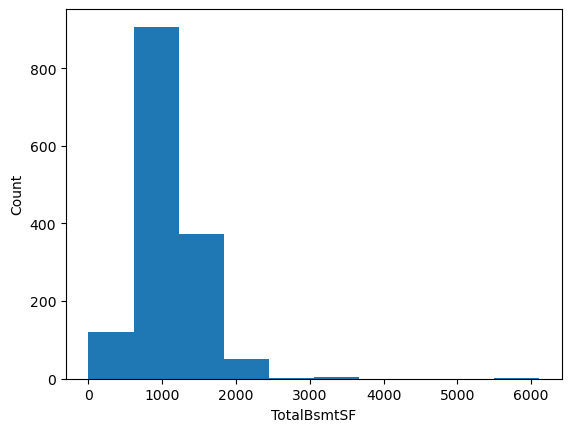

In [41]:
#4. TotalBsmtSF- Total square feet of basement area
plt.hist(Housing_df1['TotalBsmtSF'])
plt.xlabel('TotalBsmtSF')
plt.ylabel('Count')
plt.show()

In [42]:
Housing_df1['TotalBsmtSF'].describe()

count    1460.000000
mean     1057.429452
std       438.705324
min         0.000000
25%       795.750000
50%       991.500000
75%      1298.250000
max      6110.000000
Name: TotalBsmtSF, dtype: float64

In [43]:
#Based on histogram and describe, we can observe that the TotalBsmtSF varies from 0 to 6110 with the mean of 1057
#The most of the GarageArea is in range form 0 to 1500

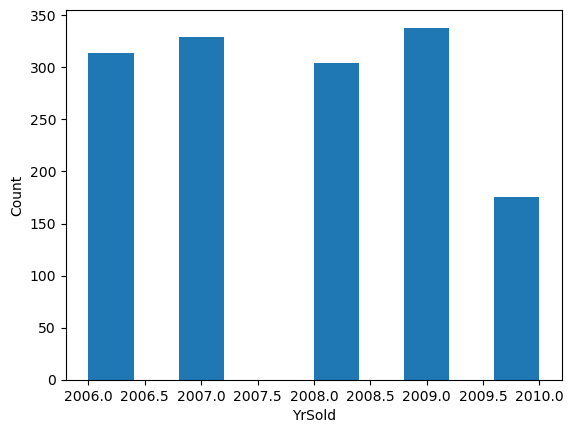

In [44]:
#5.YrSold - Year Sold (YYYY)
plt.hist(Housing_df1['YrSold'])
plt.xlabel('YrSold')
plt.ylabel('Count')
plt.show()

In [45]:
#Based on histogram, we can observe that the YrSold varies from 2006 to 2010 with the least year sold as 2010.

Categorical Data

<Axes: xlabel='OverallQual', ylabel='count'>

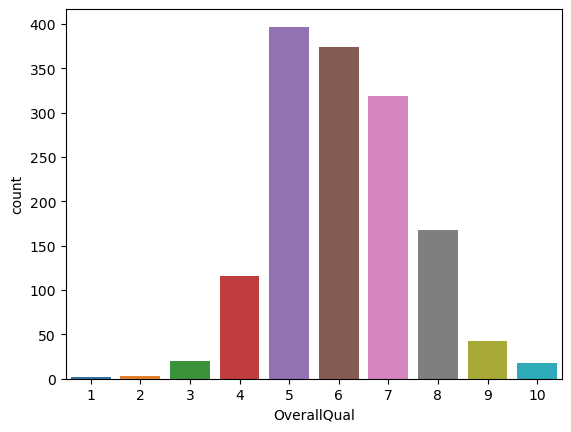

In [46]:
#1. OverallQual- Rates the overall material and finish of the house
sns.countplot(data=Housing_df1, x='OverallQual')

In [47]:
# Checking the value count for the OverallQual
Housing_df1.OverallQual.value_counts()

5     397
6     374
7     319
8     168
4     116
9      43
3      20
10     18
2       3
1       2
Name: OverallQual, dtype: int64

In [48]:
#From the above countplot and value counts we can observe that most of the house rating in between 5-7 based on OverallQual.

<Axes: xlabel='ExterQual', ylabel='count'>

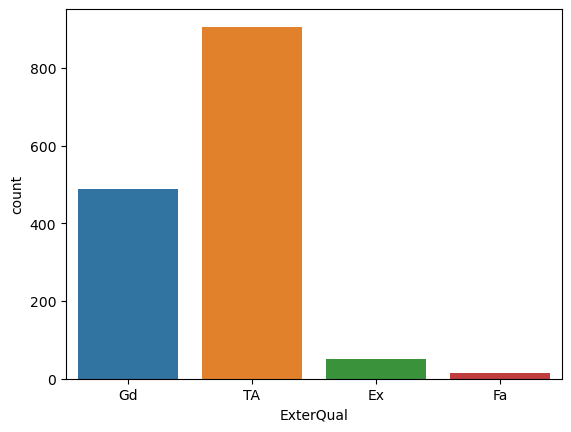

In [49]:
#2. ExterQual: Evaluates the quality of the material on the exterior 
sns.countplot(data=Housing_df1, x='ExterQual')

In [50]:
# Checking the value count for the ExterQual
Housing_df1.ExterQual.value_counts()

TA    906
Gd    488
Ex     52
Fa     14
Name: ExterQual, dtype: int64

In [51]:
#From the above countplot and value counts we can observe that most of the house ExterQual Average/Typical(TA) and good(Gd).

<Axes: xlabel='Fence', ylabel='count'>

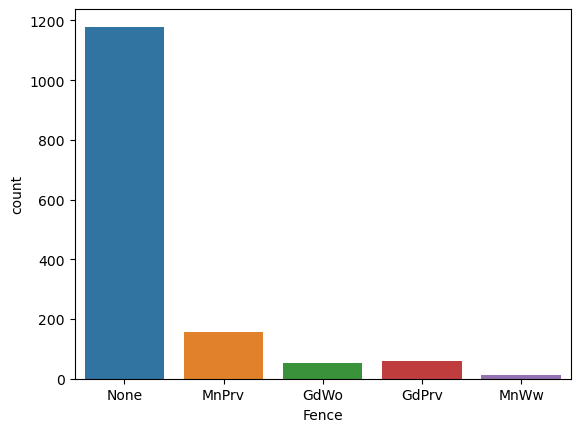

In [52]:
#3. Fence - Fence quality
sns.countplot(data=Housing_df1, x='Fence')

In [53]:
# Checking the value count for the Fence
Housing_df1.Fence.value_counts()

None     1179
MnPrv     157
GdPrv      59
GdWo       54
MnWw       11
Name: Fence, dtype: int64

In [54]:
#From the above countplot and value counts we can observe that most of the house Fence have No Fence.

<Axes: xlabel='SaleCondition', ylabel='count'>

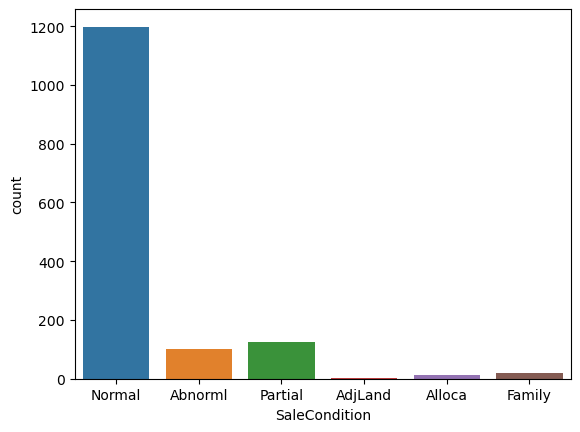

In [55]:
#4. SaleCondition - Condition of sale
sns.countplot(data=Housing_df1, x='SaleCondition')

In [56]:
# Checking the value count for the SaleCondition
Housing_df1.SaleCondition.value_counts()

Normal     1198
Partial     125
Abnorml     101
Family       20
Alloca       12
AdjLand       4
Name: SaleCondition, dtype: int64

In [57]:
#From the above countplot and value counts we can observe that most of the house SaleCondition is Normal.

<Axes: xlabel='MSZoning', ylabel='count'>

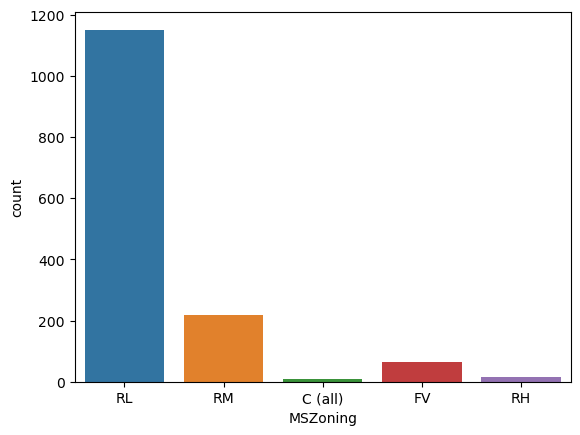

In [58]:
#5. MSZoning: Identifies the general zoning classification of the sale.
sns.countplot(data=Housing_df1, x='MSZoning')

In [59]:
# Checking the value count for the MSZoning
Housing_df1.MSZoning.value_counts()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

In [60]:
#From the above countplot and value counts we can observe that most of the house MSZoning is with Residential Low Density.

####  Bivariate Analysis

Numerical Data

<Axes: xlabel='SalePrice', ylabel='GrLivArea'>

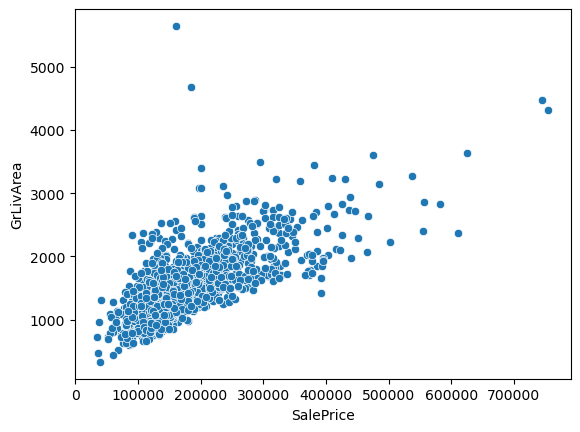

In [61]:
#1.plot between SalesPrice and GrLivArea
sns.scatterplot(data=Housing_df1, x="SalePrice", y="GrLivArea")

In [62]:
# From the above plot we can observe the relation ship between SalePrice and GrLivArea 

<Axes: xlabel='SalePrice', ylabel='YrSold'>

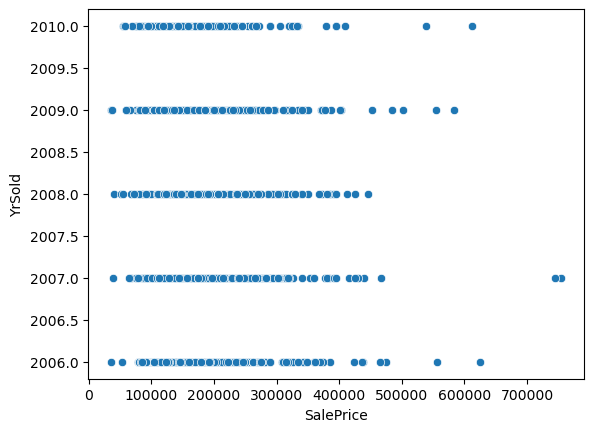

In [63]:
#2.plot between SalesPrice and Yearsold
sns.scatterplot(data=Housing_df1, x="SalePrice", y="YrSold")

In [64]:
# From the above plot we can observe the Salesprice is independent of Yearsold.

<Axes: xlabel='SalePrice', ylabel='GarageArea'>

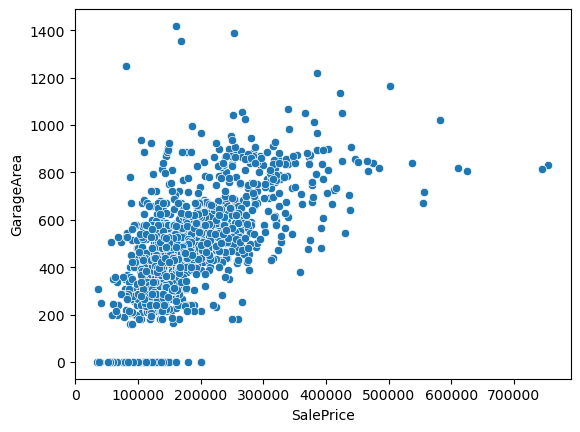

In [65]:
#3.plot between SalesPrice and GarageArea
sns.scatterplot(data=Housing_df1, x="SalePrice", y="GarageArea")

In [66]:
# From the above plot we can observe the relation ship between Salesprice and Garage area

<Axes: xlabel='SalePrice', ylabel='TotalBsmtSF'>

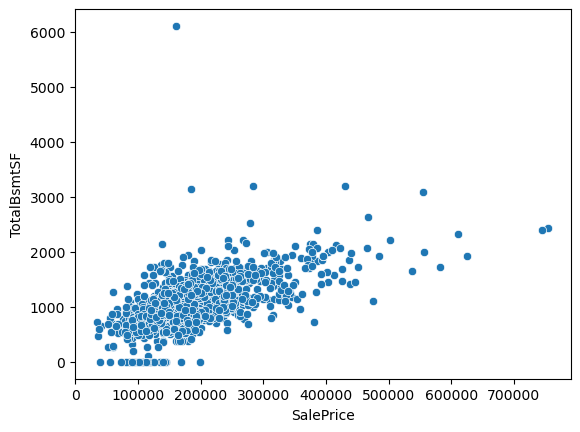

In [67]:
#4.plot between SalesPrice and TotalBsmtSF
sns.scatterplot(data=Housing_df1, x="SalePrice", y="TotalBsmtSF")

In [68]:
# From the above plot we can observe the relation ship between Salesprice and TotalBsmtSF

Categorical Data

<Axes: xlabel='ExterQual', ylabel='SalePrice'>

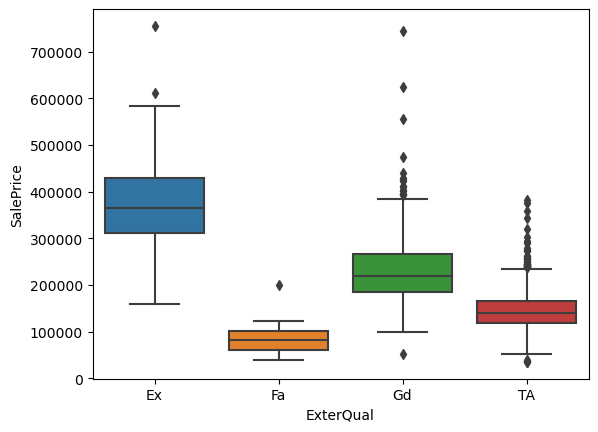

In [69]:
# 1.Ploting box plot between ExterQual and SalePrice
sns.boxplot(x=Housing_df1.ExterQual.sort_values(ascending=True), y='SalePrice', data=Housing_df1)

In [70]:
# from the above plot we can see that External quality with excellent will have more saleprice.

<Axes: xlabel='MasVnrType', ylabel='SalePrice'>

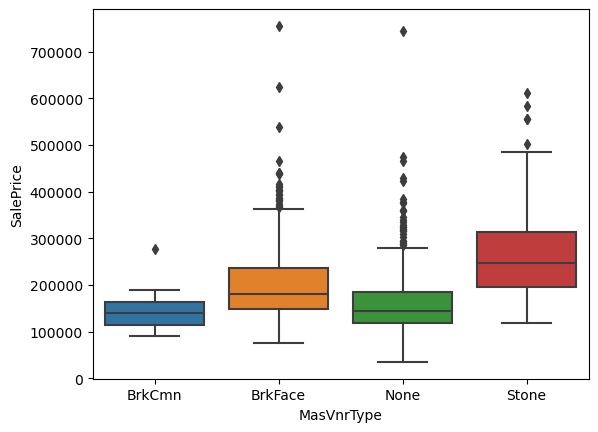

In [71]:
# 2.Ploting box plot between MasVnrType and SalePrice
sns.boxplot(x=Housing_df1.MasVnrType.sort_values(ascending=True), y='SalePrice', data=Housing_df1)

In [72]:
# from the above plot we can see that MasVnrType with Stone will have more saleprice.

<Axes: xlabel='OverallQual', ylabel='SalePrice'>

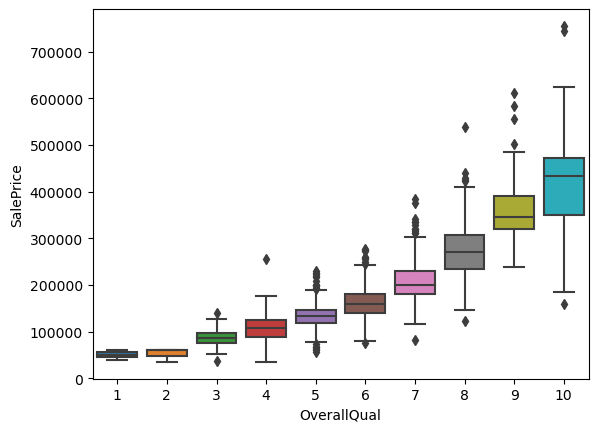

In [73]:
#3.Ploting box plot between OverallQual and SalePrice
sns.boxplot(x=Housing_df1.OverallQual.sort_values(ascending=True), y='SalePrice', data=Housing_df1)

In [74]:
# from the above plot we can see that OverallQual with 10 will have more saleprice.

#### Multi-variate analysis 

Text(0.5, 1.0, 'Correlation Matrix Heatmap')

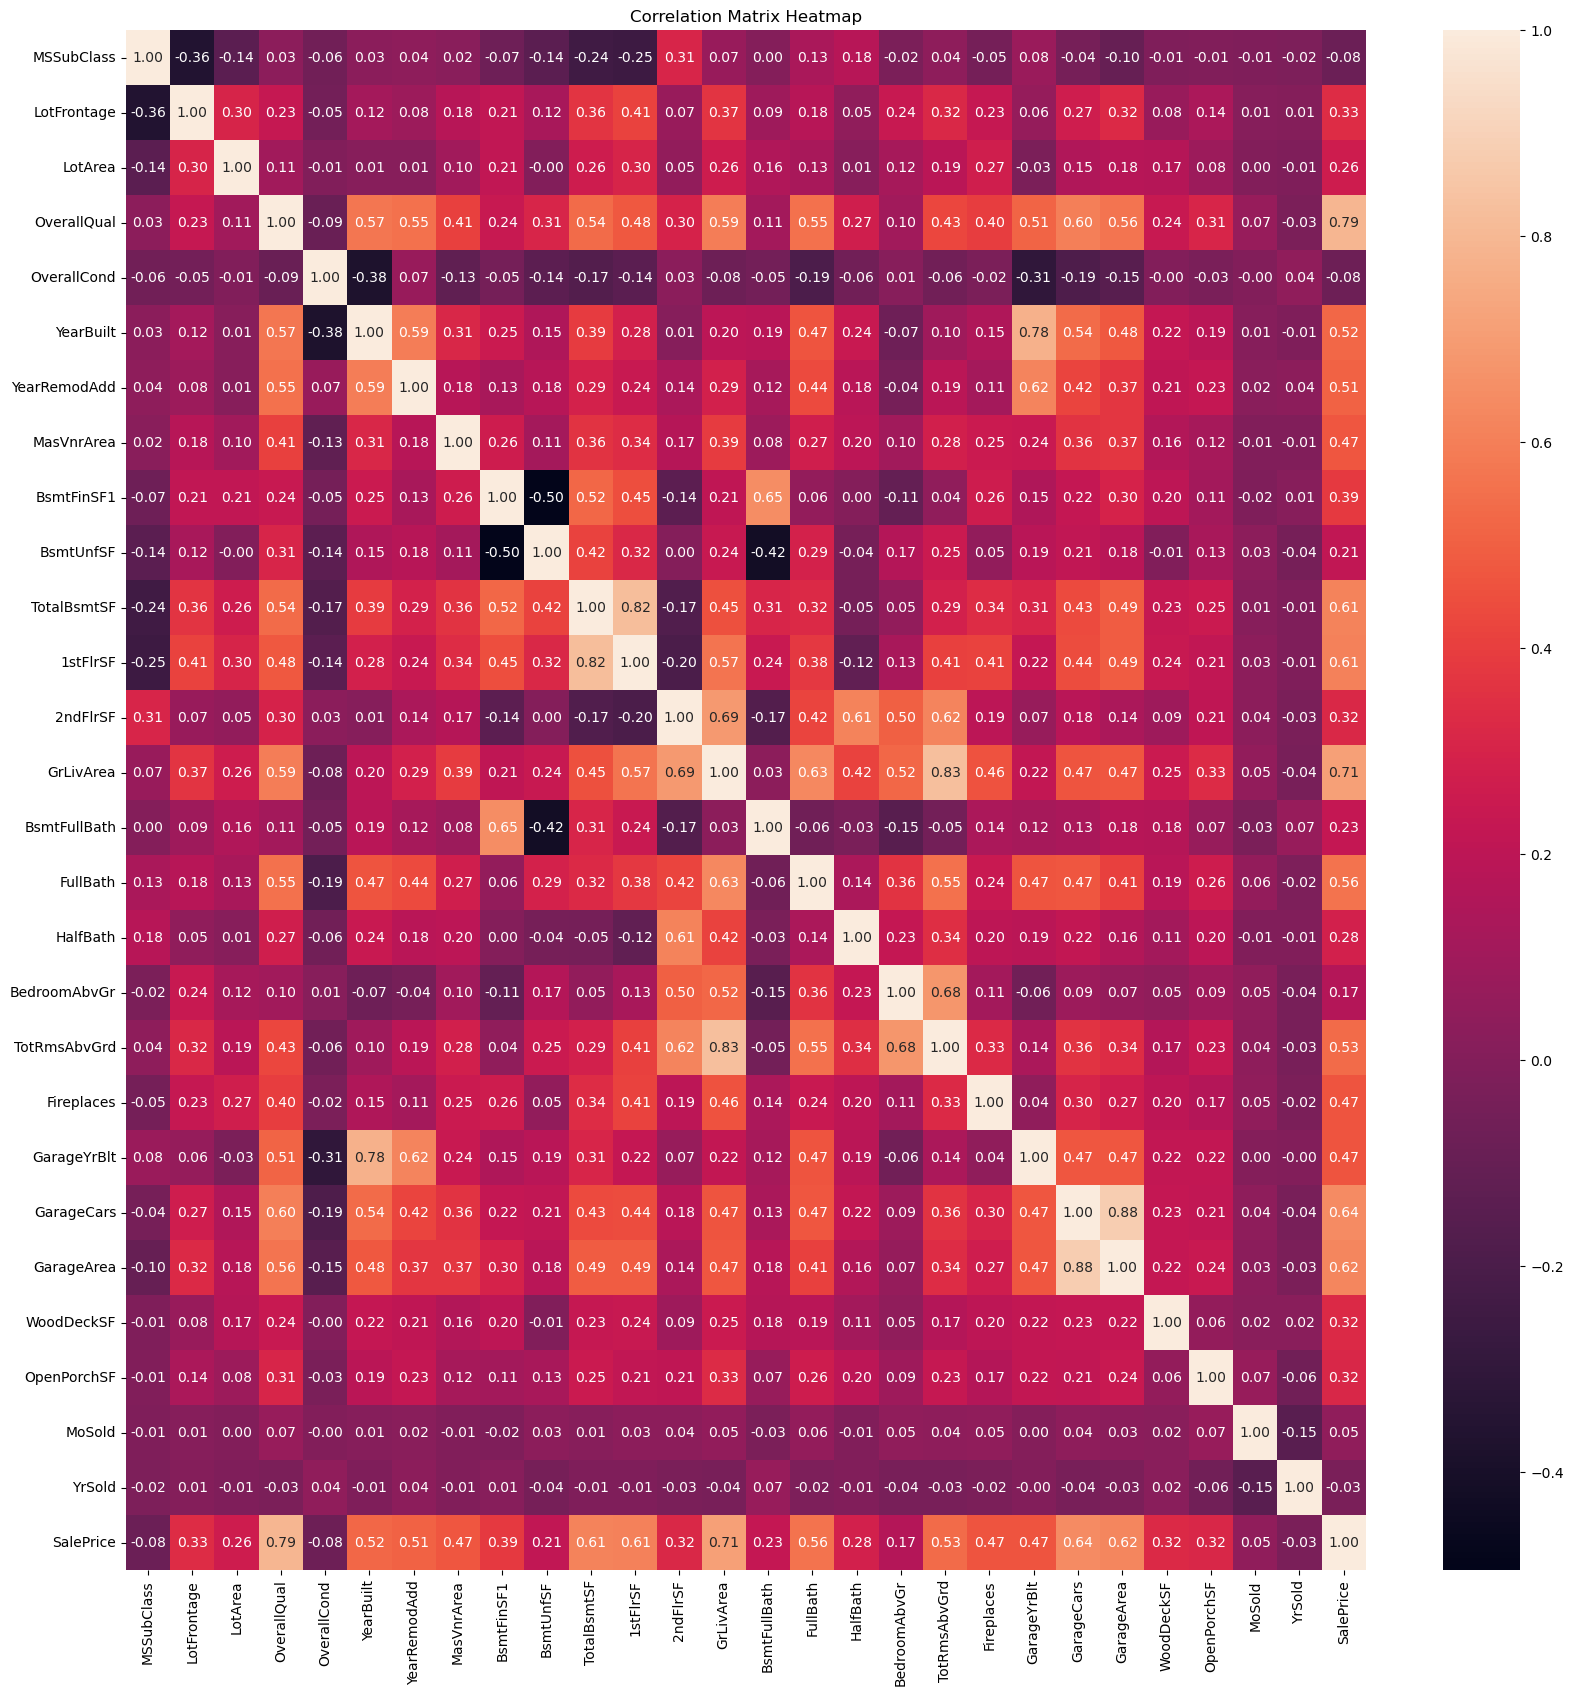

In [75]:
# Correlation and heat map between different numerical data
plt.figure(figsize=(20, 20))
sns.heatmap(Housing_df1.corr(), annot = True, fmt='.2f', annot_kws={"size": 10})
plt.title("Correlation Matrix Heatmap")

In [76]:
# From the above heat map we can see that SalePrice is having positive correlation with OverallQuality, Groundlive area,Garager area etc.

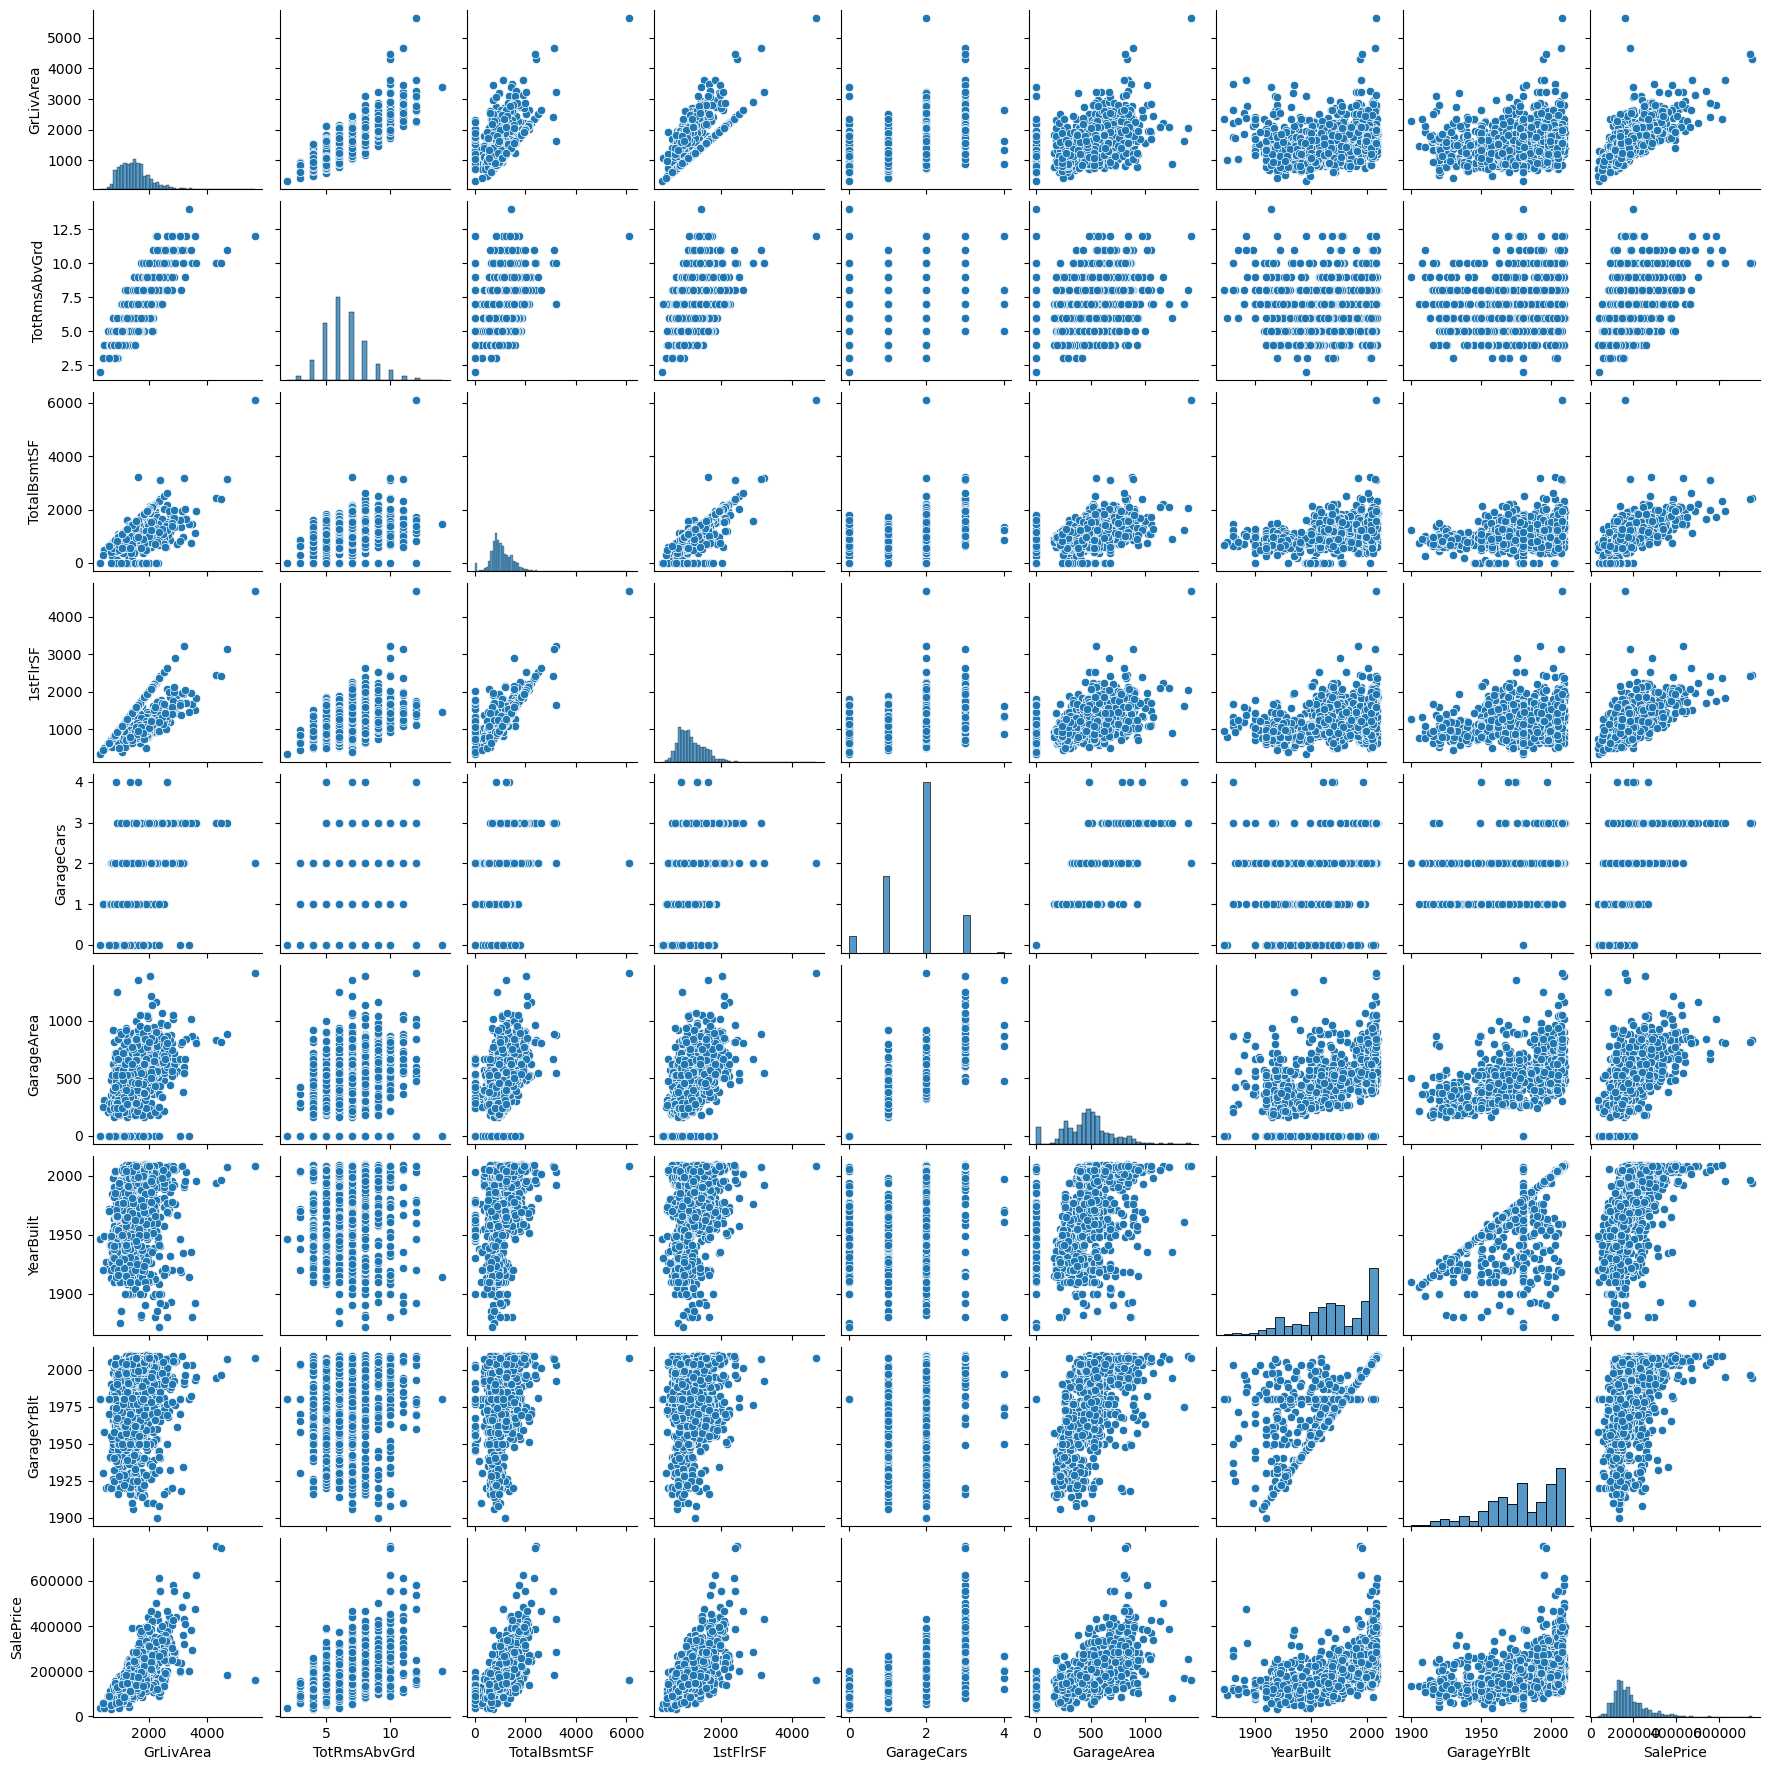

In [77]:
# as per above correlation we are ploting pair plots
corr_cols = ['GrLivArea','TotRmsAbvGrd','TotalBsmtSF','1stFlrSF','GarageCars','GarageArea','YearBuilt','GarageYrBlt','SalePrice']
sns.pairplot(Housing_df1[corr_cols],size=2)
plt.show()

In [78]:
# Dropping Garage cars as per the above pair plot
Housing_df1.drop(['GarageCars'], axis = 1, inplace=True)

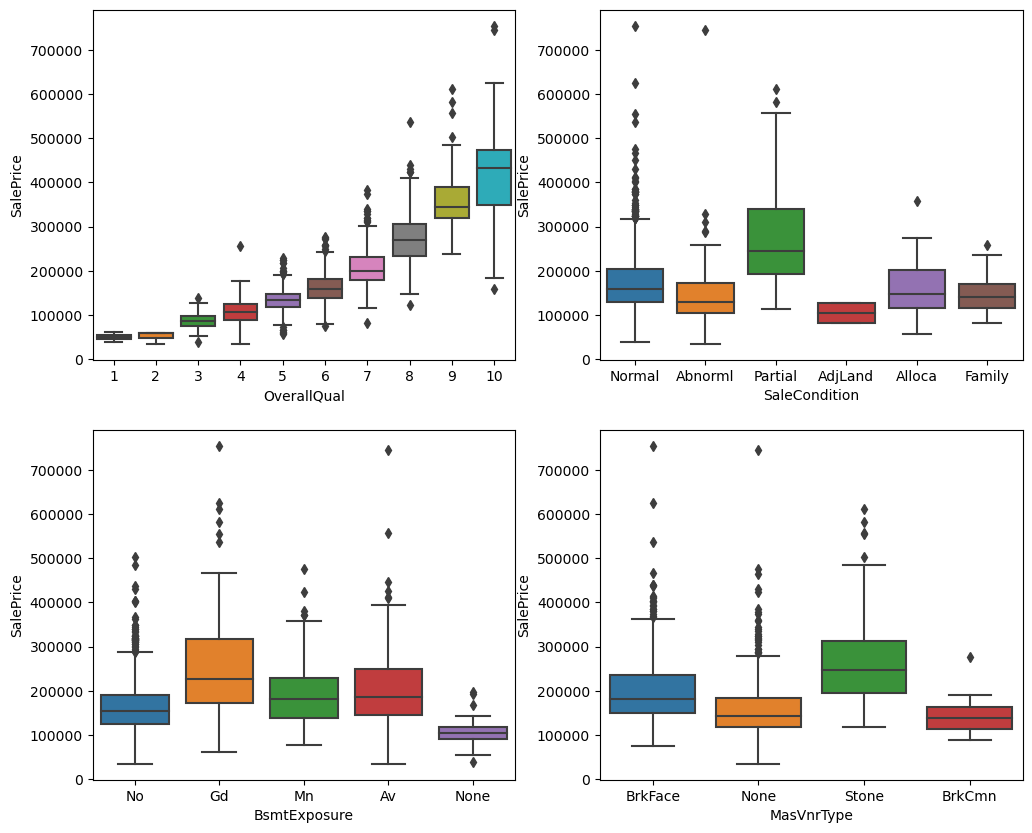

In [79]:
# As per the data set there are categorical values let us understand using box plot
plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
sns.boxplot(x="OverallQual", y = "SalePrice", data= Housing_df1)
plt.subplot(2,2,2)
sns.boxplot(x="SaleCondition", y = "SalePrice", data= Housing_df1)
plt.subplot(2,2,3)
sns.boxplot(x="BsmtExposure", y = "SalePrice", data= Housing_df1)
plt.subplot(2,2,4)
sns.boxplot(x="MasVnrType", y = "SalePrice", data= Housing_df1)
plt.show()

In [80]:
# From the box plots we can observe the salaprice depends on good basement, stone MasvnrType, 10 OverallQuali,
#pratical sale condotion

<Axes: xlabel='SalePrice', ylabel='Density'>

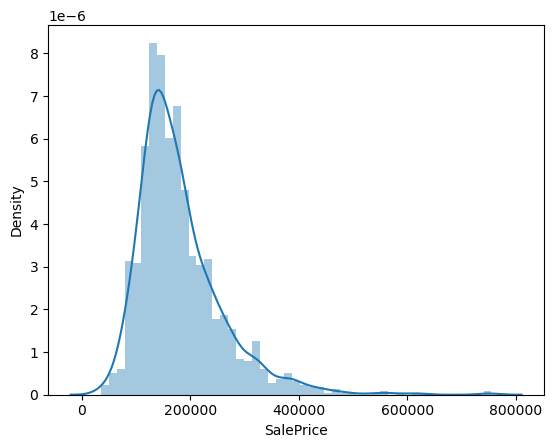

In [81]:
sns.distplot(Housing_df1['SalePrice'])

In [82]:
#From the above we can see the target variable is left skewed so we are log tranformation.

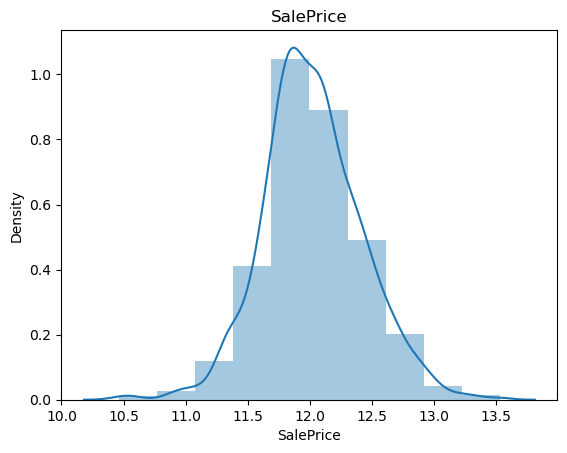

In [83]:
Housing_df1['SalePrice'] = np.log1p(Housing_df1['SalePrice'])

plt.title('SalePrice')
sns.distplot(Housing_df1['SalePrice'], bins=10)
plt.show()

### Data Preparation

In [84]:
#To count the number of unique values in each column of a DataFrame
Housing_df1.nunique()

MSSubClass         15
MSZoning            5
LotFrontage       110
LotArea          1073
LotShape            4
LotConfig           5
Neighborhood       25
BldgType            5
HouseStyle          8
OverallQual        10
OverallCond         9
YearBuilt         112
YearRemodAdd       61
RoofStyle           6
Exterior1st        15
Exterior2nd        16
MasVnrType          4
MasVnrArea        327
ExterQual           4
Foundation          6
BsmtQual            5
BsmtExposure        5
BsmtFinType1        7
BsmtFinSF1        637
BsmtUnfSF         780
TotalBsmtSF       721
HeatingQC           5
1stFlrSF          753
2ndFlrSF          417
GrLivArea         861
BsmtFullBath        4
FullBath            4
HalfBath            3
BedroomAbvGr        8
KitchenQual         4
TotRmsAbvGrd       12
Fireplaces          4
FireplaceQu         6
GarageType          7
GarageYrBlt        97
GarageFinish        4
GarageArea        441
WoodDeckSF        274
OpenPorchSF       202
Fence               5
MoSold    

In [85]:
# Identify and display categorical columns
categorical_columns = Housing_df1.select_dtypes(include='object').columns

In [86]:
categorical_columns

Index(['MSZoning', 'LotShape', 'LotConfig', 'Neighborhood', 'BldgType',
       'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'Foundation', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1',
       'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageType', 'GarageFinish',
       'Fence', 'SaleCondition'],
      dtype='object')

In [87]:
# creating dummies for the above categorical columns

In [88]:
# Function to create dummy variables for categorical columns
def create_dummies(Housing_dataframe, categorical_columns):
    for column in categorical_columns:
        dummies = pd.get_dummies(Housing_dataframe[column], prefix=column, drop_first=True)
        Housing_dataframe = pd.concat([Housing_dataframe, dummies], axis=1)
        Housing_dataframe.drop(column, axis=1, inplace=True)
    return Housing_dataframe

# Create dummy variables for categorical columns using the function
Housingdf_dummies = create_dummies(Housing_df1, categorical_columns)

In [89]:
Housingdf_dummies.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,MoSold,YrSold,SalePrice,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_None,BsmtQual_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_None,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_None,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_None,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706,150,856,856,854,1710,1,2,1,3,8,0,2003.0,548,0,61,2,2008,12.247699,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978,284,1262,1262,0,1262,0,2,0,3,6,1,1976.0,460,298,0,5,2007,12.109016,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486,434,920,920,866,1786,1,2,1,3,6,1,2001.0,608,0,42,9,2008,12.317171,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216,540,756,961,756,1717,1,1,0,3,7,1,1998.0,642,0,35,2,2006,11.849405,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0

In [90]:
Housingdf_dummies.shape

(1460, 162)

In [91]:
# droping the columns yearbuilt, yearremoadd, month sold and year sold, because we those doesn't draw any inference
Housingdf_dummies.drop(['YearBuilt','YearRemodAdd','MoSold','YrSold'], axis = 1, inplace= True)

## Step 4: Splitting the Data into Training and Testing Sets

In [92]:
#Before model building, you first need to perform the test-train split and scale the features.

In [93]:
# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(Housingdf_dummies, train_size= 0.7, random_state= 100)

In [94]:
df_train.shape

(1021, 158)

In [95]:
df_test.shape

(439, 158)

Rescaling the Features

    Min-Max scaling (normalization) Between 0 and 1.
    Standardisation (mean-0, sigma-1).
This time, we will use MinMax scaling.

In [96]:
Housingdf_dummies.dtypes

MSSubClass                 int64
LotFrontage              float64
LotArea                    int64
OverallQual                int64
OverallCond                int64
MasVnrArea               float64
BsmtFinSF1                 int64
BsmtUnfSF                  int64
TotalBsmtSF                int64
1stFlrSF                   int64
2ndFlrSF                   int64
GrLivArea                  int64
BsmtFullBath               int64
FullBath                   int64
HalfBath                   int64
BedroomAbvGr               int64
TotRmsAbvGrd               int64
Fireplaces                 int64
GarageYrBlt              float64
GarageArea                 int64
WoodDeckSF                 int64
OpenPorchSF                int64
SalePrice                float64
MSZoning_FV                uint8
MSZoning_RH                uint8
MSZoning_RL                uint8
MSZoning_RM                uint8
LotShape_IR2               uint8
LotShape_IR3               uint8
LotShape_Reg               uint8
LotConfig_

In [97]:
# Min Max Scaling take care of outliers
# Normalization = (X - Xmin)/(Xmax - Xmin)

#1.Instantiate an object
scaler = MinMaxScaler()

#2.Create the list of numeric variables
num_vars =['TotRmsAbvGrd','GarageYrBlt','1stFlrSF','MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual','OverallCond','MasVnrArea','BsmtFinSF1','BsmtUnfSF','TotalBsmtSF','2ndFlrSF','GrLivArea','BsmtFullBath','FullBath','HalfBath','BedroomAbvGr','Fireplaces','GarageArea','WoodDeckSF','OpenPorchSF','SalePrice']

#3.Fit on data
# Three types
#a)fit
#b)transofrm
#c)fit_transform

df_train[num_vars] = scaler.fit_transform(df_train[num_vars]) # for train data set

df_test[num_vars] = scaler.transform(df_test[num_vars]) # for test data set

In [98]:
df_train.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,SalePrice,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_None,BsmtQual_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_None,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_None,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_None,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
count,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.0,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,102

In [99]:
df_test.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,SalePrice,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_None,BsmtQual_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_None,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_None,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_None,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
count,439.000000,439.000000,439.000000,439.000000,439.00000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.0,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.0,439.0,439.0,439.000000,439.0,439.000000,439.000000,439.0,439.000000,439.000000,439.0,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.0,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,

## Step 5: Model Building and Evaluation

### Linear Regression 

In [100]:
#Dividing into X and Y sets for the model building
y_train = df_train.pop('SalePrice')
X_train = df_train

#Dividing into X and Y sets for the model building
y_test = df_test.pop('SalePrice')
X_test = df_test

In [101]:
# Running RFE with the output number of the variable equal to 50
lm = LinearRegression()

rfe = RFE(lm,n_features_to_select=50)            # running RFE
rfe = rfe.fit(X_train, y_train)

In [102]:
col = X_train.columns[rfe.support_]
X_train_rfe = X_train[col]
X_test_rfe  = X_test[col]

In [103]:
lm.fit(X_train_rfe,y_train)

LinearRegression()

In [104]:
y_pred_train = lm.predict(X_train_rfe)
y_pred_test = lm.predict(X_test_rfe)

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric.append(mse_test_lr**0.5)

0.8935696943541933
0.8741892611808094
1.8068372866854487
0.9631796994420037
0.001769674129956365
0.0021940312060182315


Text(0.5, 0, 'Errors')

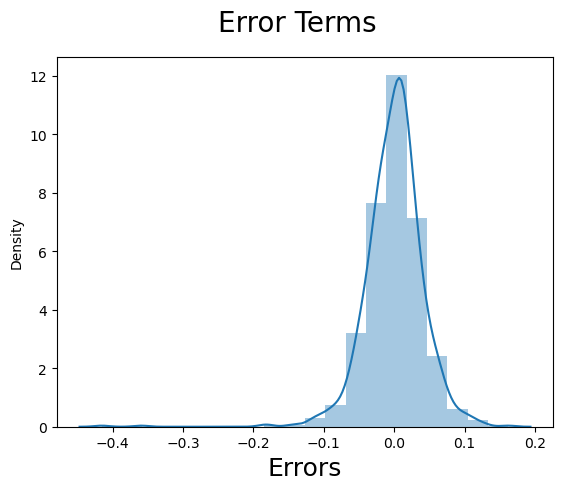

In [105]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_pred_train), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)  

### Ridge Regression

In [106]:
# Applying Ridge Regression with varying the hyperparameter 'params'
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
ridge_model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
ridge_model_cv.fit(X_train_rfe, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [107]:
# Printing the best hyperparameter alpha
print(ridge_model_cv.best_params_)

{'alpha': 0.9}


In [108]:
ridge_cv_results = pd.DataFrame(ridge_model_cv.cv_results_)
ridge_cv_results = ridge_cv_results[ridge_cv_results['param_alpha']<=3]
ridge_cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

,param_alpha,mean_train_score,mean_test_score,rank_test_score
12,0.9,-0.029574,-0.031739,1
11,0.8,-0.029531,-0.031740,2
13,1.0,-0.029616,-0.031744,3
10,0.7,-0.029487,-0.031745,4
9,0.6,-0.029443,-0.031751,5
8,0.5,-0.029401,-0.031760,6
7,0.4,-0.029360,-0.031784,7
6,0.3,-0.029319,-0.031822,8
14,2.0,-0.030026,-0.031872,9
5,0.2,-0.029278,-0.031876,10


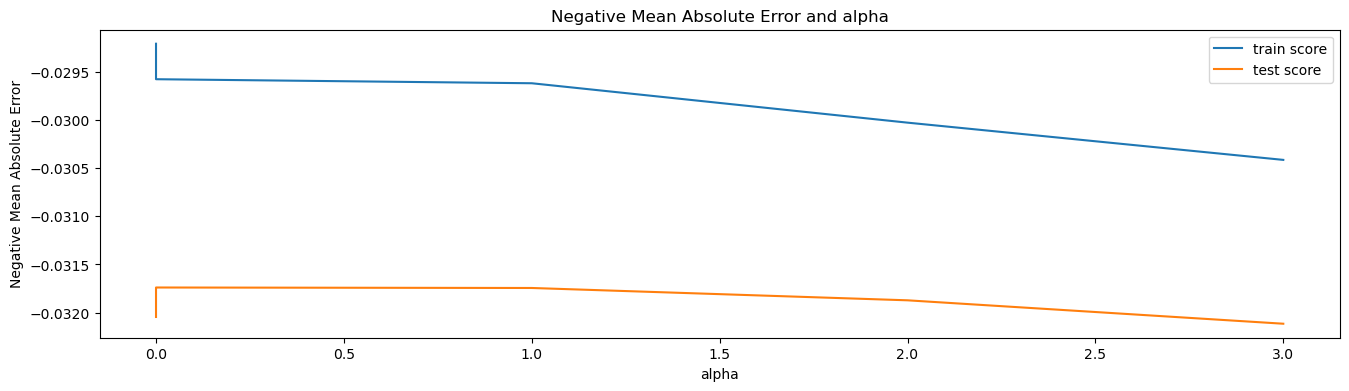

In [109]:
# plotting mean test and train scoes with alpha 

ridge_cv_results['param_alpha'] = ridge_cv_results['param_alpha'].astype('int32')

# plotting
plt.figure(figsize=(16,4)) 
plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_train_score'])
plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [110]:
#Fitting Ridge model for alpha = 0.9 and printing coefficients which have been penalised
alpha = ridge_model_cv.best_params_['alpha']
ridge = Ridge(alpha=alpha)

ridge.fit(X_train_rfe, y_train)
print(ridge.coef_) 

[-0.03962749 -0.04378286  0.08586462  0.19895675  0.11530963 -0.02765997
  0.0956338   0.15021284  0.05466985  0.06504796  0.03601354  0.02508429
  0.052666    0.04014745  0.09333753  0.08386184  0.09155851  0.1006799
  0.07516812 -0.03509701  0.04213231  0.04624709 -0.02621577  0.04492261
  0.04306852  0.0432212   0.04289998 -0.02747587  0.01564395 -0.04149602
  0.03189375 -0.01387284 -0.01800202 -0.01387284  0.01813486  0.02262332
  0.03965131  0.02081991  0.0478591   0.03642328 -0.05044866 -0.02778753
 -0.04676171 -0.04737935  0.0261261  -0.04676171 -0.01952375 -0.03095573
 -0.02463831 -0.03576988]


In [111]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train_rfe)
y_pred_test = ridge.predict(X_test_rfe)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.8916578326524519
0.8743113080602828
1.8392944236703623
0.9622453350324767
0.001801463686258925
0.002191902813285824


### Lasso Regression

In [112]:
# Applying Lasso Regression with varying the hyperparameter
lasso = Lasso()

# cross validation
lasso_model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_model_cv.fit(X_train_rfe, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [113]:
# Printing the best hyperparameter alpha
print(lasso_model_cv.best_params_)

{'alpha': 0.0001}


In [114]:
lasso_cv_results = pd.DataFrame(lasso_model_cv.cv_results_)
lasso_cv_results = lasso_cv_results[lasso_cv_results['param_alpha']<=1]
lasso_cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

,param_alpha,mean_train_score,mean_test_score,rank_test_score
0,0.0001,-0.029419,-0.031491,1
1,0.001,-0.035630,-0.036817,2
2,0.01,-0.070342,-0.070614,3
3,0.05,-0.100860,-0.101036,4
4,0.1,-0.100860,-0.101036,4
5,0.2,-0.100860,-0.101036,4
6,0.3,-0.100860,-0.101036,4
7,0.4,-0.100860,-0.101036,4
8,0.5,-0.100860,-0.101036,4
9,0.6,-0.100860,-0.101036,4


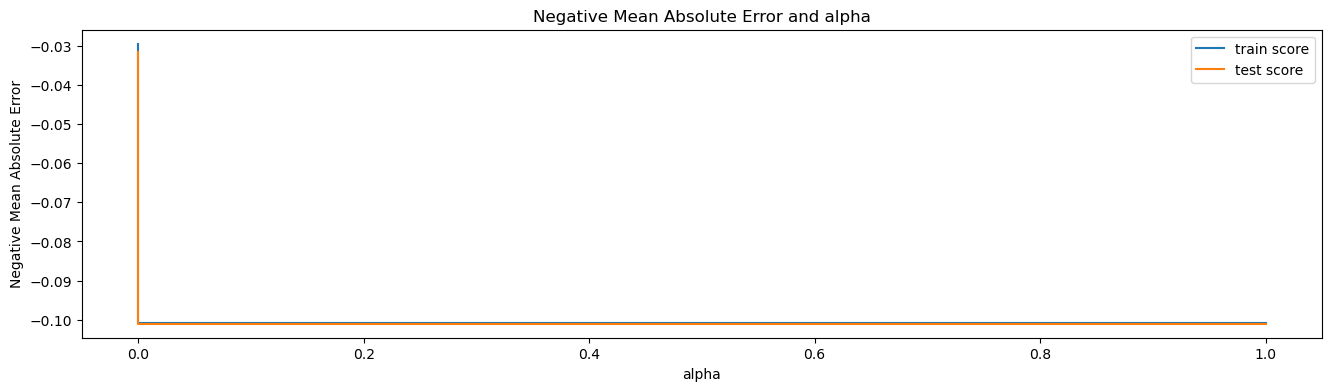

In [115]:
# plotting mean test and train scoes with alpha 

lasso_cv_results['param_alpha'] = lasso_cv_results['param_alpha'].astype('int32')

# plotting
plt.figure(figsize=(16,4)) 
plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_train_score'])
plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [116]:
#Fitting Ridge model for alpha = 0.0001 and printing coefficients which have been penalised

alpha =lasso_model_cv.best_params_['alpha']

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train_rfe, y_train) 

Lasso(alpha=0.0001)

In [117]:
lasso.coef_

array([-0.03693841, -0.02533767,  0.06432577,  0.22081103,  0.11357435,
       -0.        ,  0.07590107,  0.1854499 ,  0.05163598,  0.0602556 ,
        0.03029248,  0.00977056,  0.04732777,  0.03814693,  0.09092276,
        0.06887894,  0.07391577,  0.08627268,  0.05736604, -0.03091051,
        0.0387873 ,  0.04091761, -0.02730874,  0.03737676,  0.03933869,
        0.03969334,  0.03235323, -0.02332348,  0.        , -0.00602821,
        0.03039298, -0.        ,  0.        , -0.        ,  0.        ,
        0.01763887,  0.03494298,  0.        ,  0.02110543,  0.        ,
       -0.04114291, -0.02127113, -0.05250178, -0.03956639,  0.02462674,
       -0.01741214, -0.01730243, -0.        , -0.02340249, -0.02775558])

In [118]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train_rfe)
y_pred_test = lasso.predict(X_test_rfe)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.888452813182052
0.8779220305263199
1.8937051354364567
0.9346024278192517
0.0018547552746684198
0.0021289349153058128


In [119]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),0.893570,0.891658,0.888453
1,R2 Score (Test),0.874189,0.874311,0.877922
2,RSS (Train),1.806837,1.839294,1.893705
3,RSS (Test),0.963180,0.962245,0.934602
4,MSE (Train),0.042067,0.042444,0.043067
5,MSE (Test),0.046840,0.046818,0.046140


*From the above Metric table we can observe the Lasso Regression performance well on the Test data as compared to  Ridge and Linear.

*The Difference between train and test data for Lasso is approx 1% where as for Rigde and Linear is approx 2%.

*Lasso Regression performs well on unseen data as compared to Ridge and Linear Regression.

*MSE(Test) of Lasso is less than Ridge and Linear Regression.

*From the above point we can consider Lasso Regression is better for the above Housing dataset.

### coefficients after regularization¶

In [120]:
betas = pd.DataFrame(index=X_train_rfe.columns)
betas.rows = X_train_rfe.columns

In [121]:
ridge_df = pd.DataFrame({'Features':X_train_rfe.columns, 'Coefficient':ridge.coef_.round(4)})
ridge_df.reset_index(drop=True, inplace=True)
ridge_df.sort_values(by='Coefficient',ascending=False)

,Features,Coefficient
3,OverallQual,0.1990
7,GrLivArea,0.1502
4,OverallCond,0.1153
17,MSZoning_RL,0.1007
6,1stFlrSF,0.0956
14,GarageArea,0.0933
16,MSZoning_RH,0.0916
2,LotArea,0.0859
15,MSZoning_FV,0.0839
18,MSZoning_RM,0.0752


From the above Coefficients table 
We can obeserve that the Coefficient for Ridge ranges from 0.1990 to -0.0504.

In [122]:
Lasso_df = pd.DataFrame({'Features':X_train_rfe.columns, 'Coefficient':lasso.coef_.round(4)})
Lasso_df.reset_index(drop=True, inplace=True)
Lasso_df.sort_values(by='Coefficient',ascending=False)

,Features,Coefficient
3,OverallQual,0.2208
7,GrLivArea,0.1854
4,OverallCond,0.1136
14,GarageArea,0.0909
17,MSZoning_RL,0.0863
6,1stFlrSF,0.0759
16,MSZoning_RH,0.0739
15,MSZoning_FV,0.0689
2,LotArea,0.0643
9,FullBath,0.0603


From the above Coefficients table 
We can obeserve that the Coefficient for Lasso ranges from 0.2208 to -0.0525.

Top 10 features based on the Coefficients, we can select are:

        Features	  Coefficient    
       OverallQual 	  0.2208
       GrLivArea	  0.1854
       OverallCond    0.1136
       GarageArea	  0.0909
       MSZoning_RL    0.0863
       1stFlrSF       0.0759
       MSZoning_RH    0.0739
       MSZoning_FV 	  0.0689
       LotArea     	  0.0643
       FullBath       0.0603

### Question-1

#### Ridge Regression doubling the alpha 

In [123]:
# Question 1 When we double the alpha 
# Applying Lasso Regression model 1
ridge = Ridge()

# cross validation
folds = 5
ridge_model_cv_1 = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
ridge_model_cv_1.fit(X_train_rfe, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [124]:
# Printing the best hyperparameter alpha
print(ridge_model_cv_1.best_params_)

{'alpha': 0.9}


In [125]:
#Fitting Ridge model for alpha = 0.9 * 2 and printing coefficients which have been penalised
alpha = ridge_model_cv_1.best_params_['alpha']
alpha = alpha * 2
ridge = Ridge(alpha=alpha)

ridge.fit(X_train_rfe, y_train)
print(alpha) 

1.8


In [126]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = ridge.predict(X_train_rfe)
y_pred_test = ridge.predict(X_test_rfe)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.8891622007208132
0.8726707201295381
1.8816620632309768
0.9748053200136774
0.001842959905221329
0.0022205132574343446


In [127]:
ridge_df_1 = pd.DataFrame({'Features':X_train_rfe.columns, 'Coefficient':ridge.coef_.round(4)})
ridge_df_1.reset_index(drop=True, inplace=True)
ridge_df_1.sort_values(by='Coefficient',ascending=False)

,Features,Coefficient
3,OverallQual,0.1922
7,GrLivArea,0.1284
4,OverallCond,0.1121
14,GarageArea,0.0932
6,1stFlrSF,0.0916
17,MSZoning_RL,0.0794
9,FullBath,0.0679
16,MSZoning_RH,0.0671
2,LotArea,0.0653
15,MSZoning_FV,0.0614


#### Lasso Regression for doubling alpha 

In [128]:
# Question 1 When we double the alpha 
# Applying Lasso Regression model 1
lasso = Lasso()

# cross validation
lasso_model_cv_1 = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_model_cv_1.fit(X_train_rfe, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [129]:
# Printing the best hyperparameter alpha
print(lasso_model_cv_1.best_params_)

{'alpha': 0.0001}


In [130]:
alpha =lasso_model_cv_1.best_params_['alpha']
alpha = alpha * 2
lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train_rfe, y_train)
print(alpha)

0.0002


In [131]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train_rfe)
y_pred_test = lasso.predict(X_test_rfe)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.8804266832695572
0.8727793661186324
2.0299624796739018
0.9739735499111919
0.001988210068240844
0.002218618564717977


In [132]:
Lasso_df_1 = pd.DataFrame({'Features':X_train_rfe.columns, 'Coefficient':lasso.coef_.round(4)})
Lasso_df_1.reset_index(drop=True, inplace=True)
Lasso_df_1.sort_values(by='Coefficient',ascending=False)

,Features,Coefficient
3,OverallQual,0.2362
7,GrLivArea,0.1737
4,OverallCond,0.1107
14,GarageArea,0.0910
6,1stFlrSF,0.0731
9,FullBath,0.0609
8,BsmtFullBath,0.0531
12,TotRmsAbvGrd,0.0524
25,Neighborhood_Somerst,0.0387
20,Neighborhood_ClearCr,0.0377


### Question 3

After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?

In [133]:
X_train_lasso = X_train_rfe.drop(['OverallQual','GrLivArea','OverallCond','GarageArea','MSZoning_RL'], axis=1)
X_test_lasso = X_test_rfe.drop(['OverallQual','GrLivArea','OverallCond','GarageArea','MSZoning_RL'], axis=1)

In [134]:
 # Applying Lasso Regression model 2
lasso = Lasso()

# cross validation
lasso_model_cv_2 = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_model_cv_2.fit(X_train_lasso, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [135]:
# Printing the best hyperparameter alpha
print(lasso_model_cv_2.best_params_)

{'alpha': 0.0001}


In [136]:
alpha =lasso_model_cv_2.best_params_['alpha']
lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train_lasso, y_train)

Lasso(alpha=0.0001)

In [137]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train_lasso)
y_pred_test = lasso.predict(X_test_lasso)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.8228813824356771
0.7853745652932274
3.006892824741291
1.6431257270539628
0.0029450468410786397
0.0037428832051343117


In [138]:
Lasso_df_2 = pd.DataFrame({'Features':X_train_lasso.columns, 'Coefficient':lasso.coef_.round(4)})
Lasso_df_2.reset_index(drop=True, inplace=True)
Lasso_df_2.sort_values(by='Coefficient',ascending=False)

,Features,Coefficient
4,1stFlrSF,0.2371
9,TotRmsAbvGrd,0.1324
6,FullBath,0.1064
2,LotArea,0.1046
33,Foundation_Stone,0.0749
21,Neighborhood_StoneBr,0.0691
7,HalfBath,0.0662
18,Neighborhood_NoRidge,0.0656
16,Neighborhood_Crawfor,0.0611
19,Neighborhood_NridgHt,0.0592
